In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import pickle

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

In [107]:
df=pd.read_csv("features_dataSSS.csv")
df.head(1)

Unnamed: 0                                       event_name  lumpiness  \
0           1  SN005-2021-01-15 02:01:12-2021-01-15 02:04:01.5    0.31506   

   stability  flat_spots  max_level_shift  time_level_shift  max_var_shift  \
0   0.698722         128         7.237784                34      20.584248   

   time_var_shift  max_kl_shift  ...  phase_2_sd_power_16_20Hz_max_lc  \
0              29    556.740759  ...                         0.000036   

   phase_2_sd_power_4_8Hz_max_lc  phase_2_sd_power_8_12Hz_max_lc  \
0                   1.112982e-07                    7.379504e-08   

   phase_2_max_min_lc  avg_correlation_adjacent_lc  \
0           10.330718                     0.299449   

   avg_correlation_opposite_lc          Device.x  \
0                     0.684031  VA00000000000005   

                                            event_id          Device.y  \
0  RXZlbnRJbmZvcm1hdGlvbjowYmMyMjFiYS1kMDgwLTQyMD...  VA00000000000005   

       status  
0  unbalanced  

[1 rows x 608 columns]

In [108]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [109]:
df.head(1)

event_name  lumpiness  stability  \
0  SN005-2021-01-15 02:01:12-2021-01-15 02:04:01.5    0.31506   0.698722   

   flat_spots  max_level_shift  time_level_shift  max_var_shift  \
0         128         7.237784                34      20.584248   

   time_var_shift  max_kl_shift  time_kl_shift  ...  \
0              29    556.740759             37  ...   

   phase_2_sd_power_16_20Hz_max_lc  phase_2_sd_power_4_8Hz_max_lc  \
0                         0.000036                   1.112982e-07   

   phase_2_sd_power_8_12Hz_max_lc  phase_2_max_min_lc  \
0                    7.379504e-08           10.330718   

   avg_correlation_adjacent_lc  avg_correlation_opposite_lc          Device.x  \
0                     0.299449                     0.684031  VA00000000000005   

                                            event_id          Device.y  \
0  RXZlbnRJbmZvcm1hdGlvbjowYmMyMjFiYS1kMDgwLTQyMD...  VA00000000000005   

       status  
0  unbalanced  

[1 rows x 607 columns]

In [110]:
df.drop(['Device.y'],axis=1,inplace=True)

In [111]:
df.head(1)

event_name  lumpiness  stability  \
0  SN005-2021-01-15 02:01:12-2021-01-15 02:04:01.5    0.31506   0.698722   

   flat_spots  max_level_shift  time_level_shift  max_var_shift  \
0         128         7.237784                34      20.584248   

   time_var_shift  max_kl_shift  time_kl_shift  ...  \
0              29    556.740759             37  ...   

   phase_2_sd_power_12_16Hz_max_lc  phase_2_sd_power_16_20Hz_max_lc  \
0                     1.627321e-08                         0.000036   

   phase_2_sd_power_4_8Hz_max_lc  phase_2_sd_power_8_12Hz_max_lc  \
0                   1.112982e-07                    7.379504e-08   

   phase_2_max_min_lc  avg_correlation_adjacent_lc  \
0           10.330718                     0.299449   

   avg_correlation_opposite_lc          Device.x  \
0                     0.684031  VA00000000000005   

                                            event_id      status  
0  RXZlbnRJbmZvcm1hdGlvbjowYmMyMjFiYS1kMDgwLTQyMD...  unbalanced  

[1 rows x 606 columns]

In [112]:
df.rename(columns={'Device.x':'device_id'},inplace=True)

In [113]:
df.head(2)

event_name  lumpiness  stability  \
0  SN005-2021-01-15 02:01:12-2021-01-15 02:04:01.5   0.315060   0.698722   
1  SN005-2021-01-15 12:36:10-2021-01-15 12:38:44.4   1.661315   0.502367   

   flat_spots  max_level_shift  time_level_shift  max_var_shift  \
0         128         7.237784                34      20.584248   
1         195         6.591019              3746      16.591465   

   time_var_shift  max_kl_shift  time_kl_shift  ...  \
0              29    556.740759             37  ...   
1               2    285.150470           3748  ...   

   phase_2_sd_power_12_16Hz_max_lc  phase_2_sd_power_16_20Hz_max_lc  \
0                     1.627321e-08                         0.000036   
1                     4.265690e-08                         0.000027   

   phase_2_sd_power_4_8Hz_max_lc  phase_2_sd_power_8_12Hz_max_lc  \
0                   1.112982e-07                    7.379504e-08   
1                   2.134651e-07                    5.505335e-08   

   phase_2_max_min_lc  avg_correlation_adjacent_lc  \
0           10.330718                     0.299449   
1            9.035686                     0.161835   

   avg_correlation_opposite_lc         device_id  \
0                     0.684031  VA00000000000005   
1                     0.811886  VA00000000000005   

                                            event_id      status  
0  RXZlbnRJbmZvcm1hdGlvbjowYmMyMjFiYS1kMDgwLTQyMD...  unbalanced  
1  RXZlbnRJbmZvcm1hdGlvbjowYWM4ZWU5NC01MTRkLTRmMm...  unbalanced  

[2 rows x 606 columns]

In [114]:
df.status.value_counts()

balanced      572
unbalanced    502
Name: status, dtype: int64

In [115]:
# convert Target varibles  to into integer 
df['status']=df['status'].map({'balanced':1,'unbalanced':0}).astype(int)

In [116]:
df.head(1)

event_name  lumpiness  stability  \
0  SN005-2021-01-15 02:01:12-2021-01-15 02:04:01.5    0.31506   0.698722   

   flat_spots  max_level_shift  time_level_shift  max_var_shift  \
0         128         7.237784                34      20.584248   

   time_var_shift  max_kl_shift  time_kl_shift  ...  \
0              29    556.740759             37  ...   

   phase_2_sd_power_12_16Hz_max_lc  phase_2_sd_power_16_20Hz_max_lc  \
0                     1.627321e-08                         0.000036   

   phase_2_sd_power_4_8Hz_max_lc  phase_2_sd_power_8_12Hz_max_lc  \
0                   1.112982e-07                    7.379504e-08   

   phase_2_max_min_lc  avg_correlation_adjacent_lc  \
0           10.330718                     0.299449   

   avg_correlation_opposite_lc         device_id  \
0                     0.684031  VA00000000000005   

                                            event_id  status  
0  RXZlbnRJbmZvcm1hdGlvbjowYmMyMjFiYS1kMDgwLTQyMD...       0  

[1 rows x 606 columns]

In [117]:
df["status"].head(5)

0    0
1    0
2    1
3    1
4    1
Name: status, dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Columns: 606 entries, event_name to status
dtypes: float64(449), int64(154), object(3)
memory usage: 5.0+ MB


In [119]:
df.isnull().sum()

event_name                     0
lumpiness                      0
stability                      0
flat_spots                     0
max_level_shift                0
                              ..
avg_correlation_adjacent_lc    0
avg_correlation_opposite_lc    0
device_id                      0
event_id                       0
status                         0
Length: 606, dtype: int64

In [120]:
df.duplicated().sum()

0

# Exploratory Data Analysis¶

<AxesSubplot:xlabel='status', ylabel='count'>

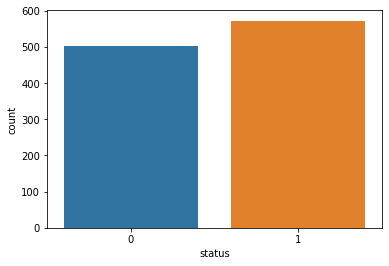

In [121]:
sns.countplot(data = df, x='status', label = "Count")

In [122]:
df.shape

(1074, 606)

## Feature Extraction & model Creation

### Create the target variable and predictors

drop unecessary columns

In [123]:
df.columns

Index(['event_name', 'lumpiness', 'stability', 'flat_spots', 'max_level_shift',
       'time_level_shift', 'max_var_shift', 'time_var_shift', 'max_kl_shift',
       'time_kl_shift',
       ...
       'phase_2_sd_power_12_16Hz_max_lc', 'phase_2_sd_power_16_20Hz_max_lc',
       'phase_2_sd_power_4_8Hz_max_lc', 'phase_2_sd_power_8_12Hz_max_lc',
       'phase_2_max_min_lc', 'avg_correlation_adjacent_lc',
       'avg_correlation_opposite_lc', 'device_id', 'event_id', 'status'],
      dtype='object', length=606)

In [124]:
df.drop(['event_name', 'device_id', 'event_id'], axis=1, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Columns: 603 entries, lumpiness to status
dtypes: float64(449), int64(154)
memory usage: 4.9 MB


### convert DataFrame object to a NumPy array to achieve faster computation.

In [126]:
X = df.drop('status', axis=1).values
y = df['status'].values

In [127]:
# Remove Input contains NaN, infinity or a value too large for dtype('float64').
np.where(df.values >= np.finfo(np.float64).max)  

(array([704, 704]), array([318, 556]))

In [128]:
# Remove Input contains NaN, infinity or a value too large for dtype('float64').
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

In [129]:
df.head(2)

lumpiness  stability  flat_spots  max_level_shift  time_level_shift  \
0   0.315060   0.698722         128         7.237784                34   
1   1.661315   0.502367         195         6.591019              3746   

   max_var_shift  time_var_shift  max_kl_shift  time_kl_shift  \
0      20.584248              29    556.740759             37   
1      16.591465               2    285.150470           3748   

   crossing_points  ...  phase_2_peaks_count_power_8_12Hz_max_lc  \
0             1480  ...                                        0   
1              358  ...                                        0   

   phase_2_sd_power_0_4Hz_max_lc  phase_2_sd_power_12_16Hz_max_lc  \
0                        0.00029                     1.627321e-08   
1                        0.00037                     4.265690e-08   

   phase_2_sd_power_16_20Hz_max_lc  phase_2_sd_power_4_8Hz_max_lc  \
0                         0.000036                   1.112982e-07   
1                         0.000027                   2.134651e-07   

   phase_2_sd_power_8_12Hz_max_lc  phase_2_max_min_lc  \
0                    7.379504e-08           10.330718   
1                    5.505335e-08            9.035686   

   avg_correlation_adjacent_lc  avg_correlation_opposite_lc  status  
0                     0.299449                     0.684031       0  
1                     0.161835                     0.811886       0  

[2 rows x 603 columns]

In [130]:
# create your new target and predictor variable arrays
X = df.drop('status', axis=1).values
y = df['status'].values

In [131]:
## Scale features
X_scaled = scale(X)

### Train test split

Split dataset into training and test set

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(1074, 603)
(751, 602)
(323, 602)


### Feature Importance

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
model.feature_importances_

array([5.95267593e-03, 4.28226791e-03, 1.20405701e-03, 5.99022535e-03,
       2.21752360e-03, 2.51508296e-03, 1.60633461e-03, 8.84266589e-03,
       2.10193852e-03, 8.49289400e-03, 2.15659974e-03, 2.56872856e-03,
       2.17242616e-03, 3.47980562e-03, 1.88539704e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.44782566e-03, 1.82844177e-03,
       2.47042309e-03, 2.04243911e-03, 2.49330437e-03, 3.43248398e-03,
       3.55495467e-03, 2.88182602e-03, 4.67588854e-03, 3.16978697e-03,
       1.98089333e-03, 4.34989870e-03, 3.14559613e-03, 2.51361951e-03,
       2.12505562e-03, 3.62440354e-03, 4.77048642e-03, 5.76334414e-03,
       1.78383975e-03, 4.40727329e-03, 5.61384534e-03, 1.75588636e-03,
       1.74028117e-03, 1.88791620e-03, 1.57963005e-03, 4.84179707e-03,
       1.55089584e-03, 1.42433704e-03, 1.59380938e-03, 2.43097364e-03,
       3.77868635e-03, 2.41928648e-03, 2.10233030e-03, 3.06015468e-03,
       2.33203046e-03, 3.37919690e-03, 2.52271133e-03, 3.08990025e-03,
      

# Add more vizulasions  for features selections part like make list importance features can able undertand which one is most important below is not claear 

In [134]:
# create a list of predictor columns
columns = list(df.columns)

# remove the status column
columns.pop(-1,)

# Extract array with features score
features = model.feature_importances_

# Create a dataframe with 2 columns, the feature and its value
import_features_score = pd.DataFrame(list(zip(columns, features)), columns =['Feature', 'val'])
import_features_score.sort_values(by='val', ascending=False, inplace=True)


import_features_score.head(50)

Feature       val
196                              phase_2_trend  0.025247
308                           phase_2_acf_lag3  0.025118
148                          phase_2_stability  0.020925
299                              phase_1_Range  0.010489
197                             phase_2_x_acf1  0.010420
69                              avg_load_total  0.009713
72                              min_load_total  0.009324
7                                 max_kl_shift  0.008843
9                              crossing_points  0.008493
186                         phase_2_diff2_acf1  0.007671
190                            phase_2_entropy  0.007585
306                           phase_2_acf_lag1  0.007539
192                          phase_2_linearity  0.007273
73                              max_load_total  0.007072
315  phase_2_filtered_avg_diff_cross_intervals  0.007035
64                                    high.pct  0.006876
352                     phase_3_start_min_diff  0.006838
88                                       Range  0.006808
388                     phase_2_energy_16_20Hz  0.006695
307                           phase_2_acf_lag2  0.006677
338                    phase_3_diff_load_total  0.006676
316                   phase_2_filtered_avgDiff  0.006665
198                            phase_2_x_acf10  0.006619
184                         phase_2_diff1_acf1  0.006589
346                     phase_3_min_load_total  0.006269
58                            avg.load.max.pct  0.006140
3                              max_level_shift  0.005990
0                                    lumpiness  0.005953
35                               freq.bin.2.cv  0.005763
65                                     mid.pct  0.005671
38                              freq.bin.2.vol  0.005614
296                     phase_1_min_load_total  0.005546
85                     unique_peaks_percentage  0.005340
284                     phase_1_avg_load_total  0.005010
320                     phase_2_max_load_total  0.005009
143                              phase_2_hurst  0.004878
311                       phase_2_cross_number  0.004867
43                 time.bin.1.avg.load.max.pct  0.004842
34                              freq.bin.1.vol  0.004770
26                                     x_acf10  0.004676
87                            unique_peaksRate  0.004541
160                       phase_3_max_kl_shift  0.004475
77                                     peak_sd  0.004465
37                              freq.bin.2.var  0.004407
29                                  diff2_acf1  0.004350
349                              phase_3_Range  0.004297
1                                    stability  0.004282
80                     filtered_distinctPoints  0.004274
187                        phase_2_diff2_acf10  0.004150
295                     phase_1_max_load_total  0.003970

#### Recommendation: Selecting features  

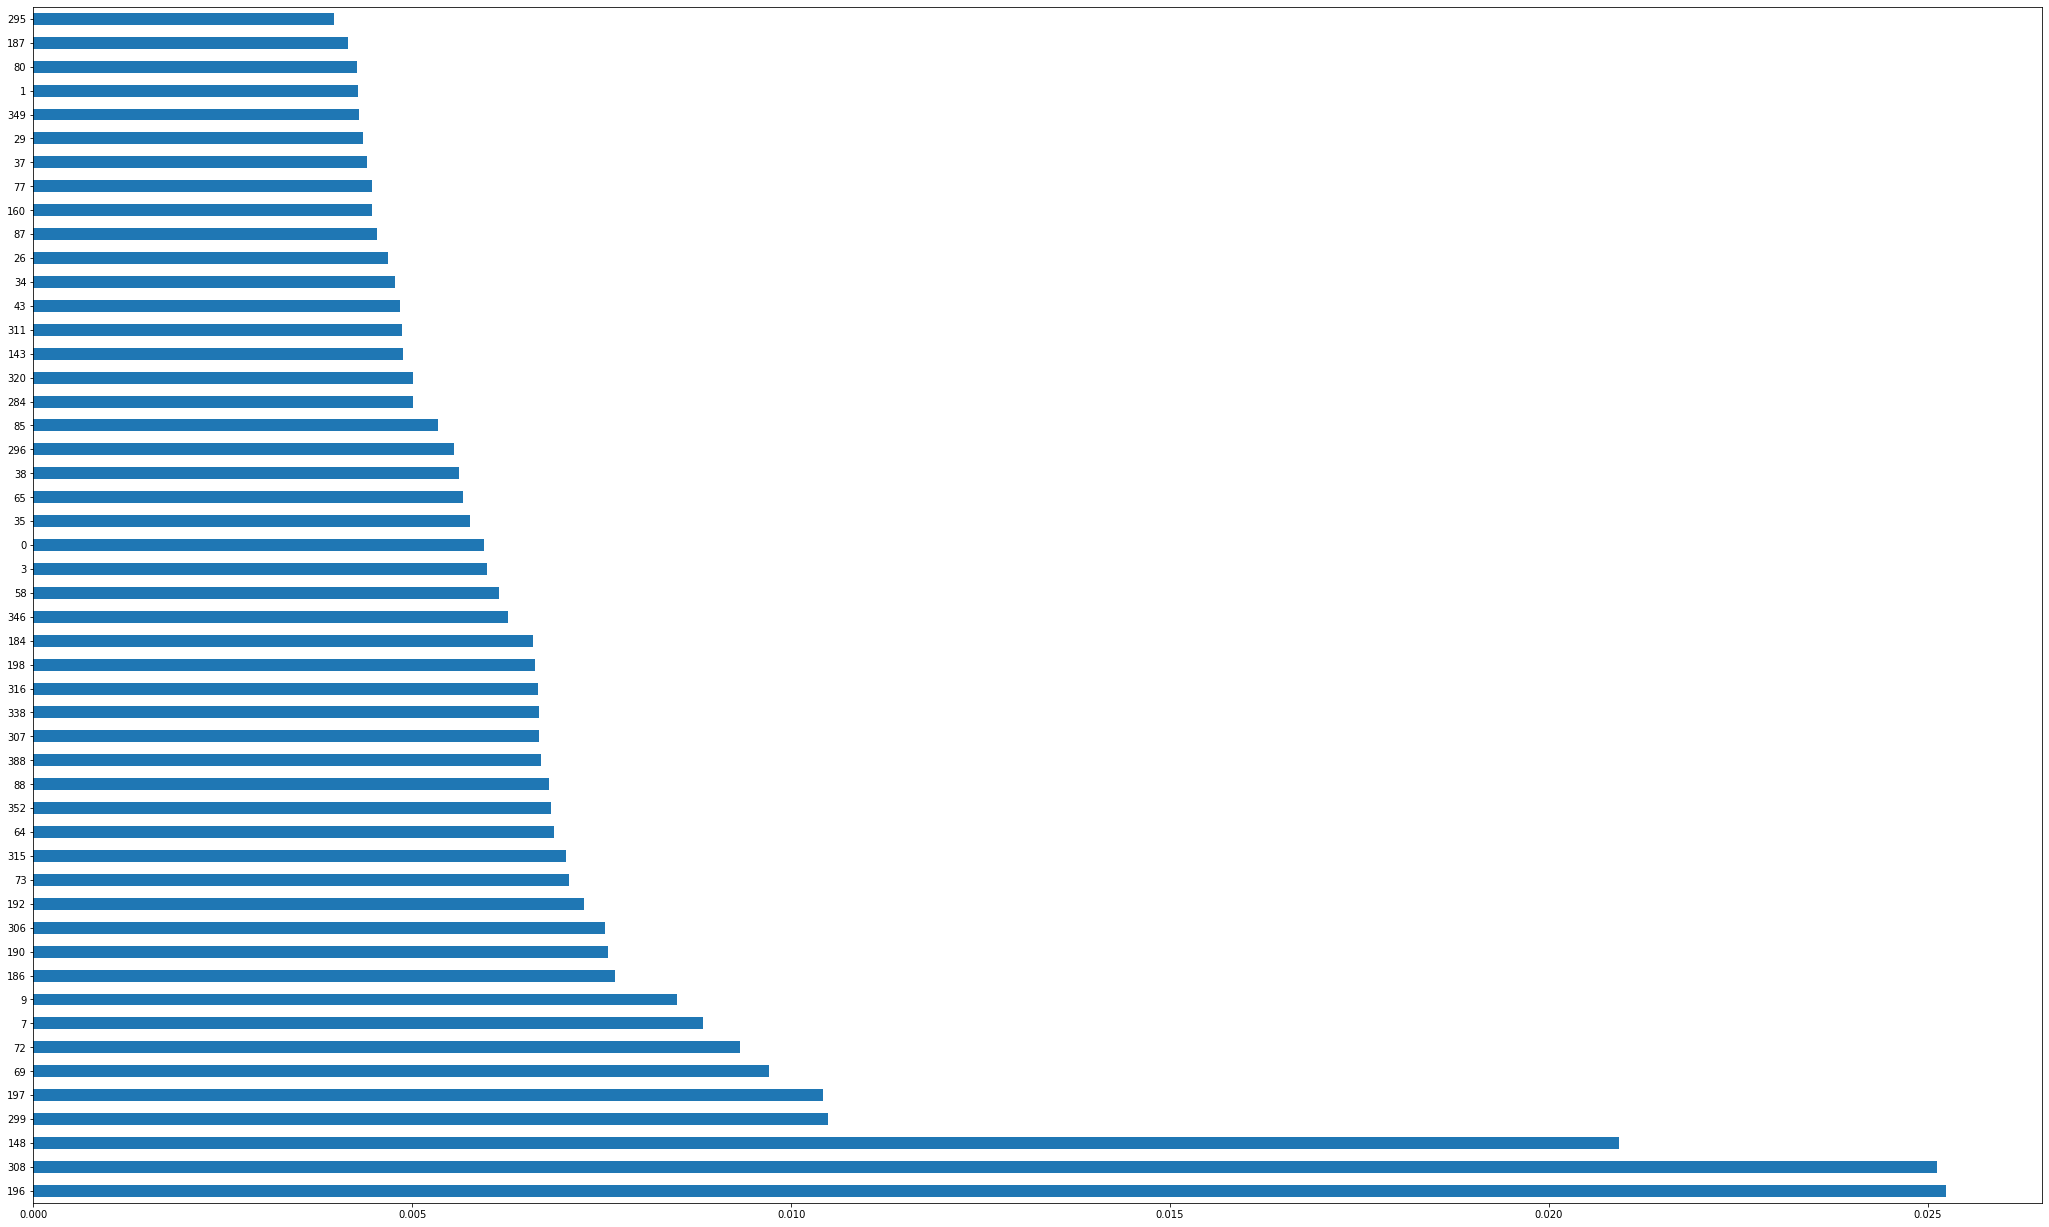

In [135]:
## Visualize the feature importance......
#please add title like x=importance features  y= want to see features name not number 

fig = plt.figure(figsize=(36,22))
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

## Combine Feature Selection & Model creation

In [105]:
# Use RFE 
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=25)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train_selected.shape: (751, 25)


In [41]:
print('Optimal number of features: {}'.format(select.n_features_))

Optimal number of features: 25


In [37]:
# Use RFE 
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=25)
select.fit(X_test,y_test)
X_test_selected = select.transform(X_test)

print("X_test_selected.shape: {}".format(X_test_selected.shape))

X_test_selected.shape: (323, 25)


## RandomForestClassifier

In [70]:
# instantiate model
model = RandomForestClassifier(n_estimators=1000,random_state=42)

In [71]:
### Model fitting for X_train,y_train
model.fit(X_train_selected,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [72]:
# Model score for train selected features 
from sklearn  import metrics 
print("Random forest Training Accuracy score: {:.3f}".format(model.score(X_train_selected,y_train))) 
y_pred = model.predict(X_test_selected)
print("classification report:{}".format(classification_report(y_test, y_pred)))


Random forest Training Accuracy score: 1.000
classification report:              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.91      0.93      0.92       160

    accuracy                           0.92       323
   macro avg       0.92      0.92      0.92       323
weighted avg       0.92      0.92      0.92       323



In [73]:
#Accuracy on train data 
print('[1]Random Forest Classifier Training Accuracy:',model.score(X_train_selected, y_train))

print("X_train_selected.shape: {}".format(X_train_selected.shape))


[1]Random Forest Classifier Training Accuracy: 1.0
X_train_selected.shape: (751, 25)


In [74]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# random_grid = {'n_estimators': n_estimators}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_selected, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 1000}

In [65]:

X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators=1000,random_state=42)

model.fit(X_train_selected,y_train)
print("Random forest Testing Accuracy: {:.3f}".format(model.score(X_test_selected,y_test)))
y_pred = model.predict(X_test_selected)
print("classification report:\n {}".format(classification_report(y_test, y_pred)))
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

Random forest Testing Accuracy: 0.920
classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.91      0.93      0.92       160

    accuracy                           0.92       323
   macro avg       0.92      0.92      0.92       323
weighted avg       0.92      0.92      0.92       323

Confusion matrix:
 [[149  14]
 [ 12 148]]


In [66]:

model.fit(X_train_selected,y_train)

y_pred_selected = model.predict(X_test_selected)
print("Ranfom forest Testing Accuracy score: {:.3f}".format(model.score(X_test_selected,y_test)))
print("classification report:\n {}".format(classification_report(y_test, y_pred)))
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

Ranfom forest Testing Accuracy score: 0.920
classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.91      0.93      0.92       160

    accuracy                           0.92       323
   macro avg       0.92      0.92      0.92       323
weighted avg       0.92      0.92      0.92       323

Confusion matrix:
 [[149  14]
 [ 12 148]]


In [48]:
#Accuracy on testdata 
print('[1]Random Forest Classifier Testing  Accuracy:',model.score(X_test_selected, y_test))

print("X_test_selected.shape: {}".format(X_test_selected.shape))

[1]Random Forest Classifier Testing  Accuracy: 0.9256965944272446
X_test_selected.shape: (323, 25)


## Creating a logistic Regression model

For this model we still use the features obtained from RFE feature selection i.e X_test(Overall data), and X_test_selected(the selected features)

In [ ]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
# instantiate the model(we set max_iter=1000 to avoid our code not running)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
## Fit all features to pipeline
pipe.fit(X_train_selected, y_train)

In [ ]:
## Model scores 
print("log_reg Training Accuracy score: {:.3f}".format(pipe.score(X_train_selected,y_train))) 
y_pred = pipe.predict(X_test_selected)
print("classification report:{}".format(classification_report(y_test, y_pred)))
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

In [ ]:
## fit selected features to pipeline 
pipe.fit(X_train_selected, y_train)

In [ ]:
## Model scores with selected features  
print("log_reg Testing Accuracy : {:.3f}".format(pipe.score(X_test_selected,y_test))) 
y_pred = pipe.predict(X_test_selected)
print("classification report:{}".format(classification_report(y_test, y_pred)))
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

## Cross vale score plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
rfc = RandomForestClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_test, y_test)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()